In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


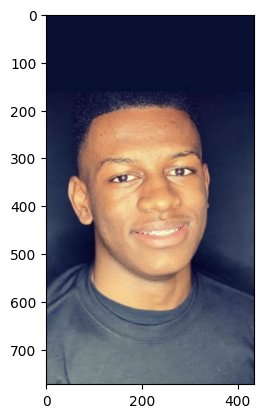

In [26]:
img = cv2.imread("JFImage.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)



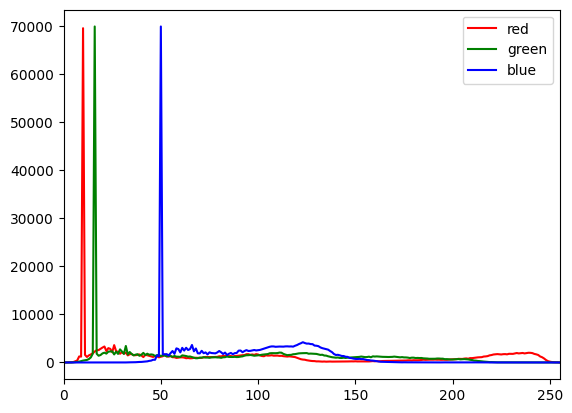

In [27]:
hist = cv2.calcHist([img], [0],None,[256],[0,255])
plt.plot(hist, color='red')
plt.xlim([0,255])

hist = cv2.calcHist([img], [1],None,[256],[0,255])
plt.plot(hist, color='green')
plt.xlim([0,255])

hist = cv2.calcHist([img], [2],None, [256],[0,255])
plt.plot(hist,color='blue')
plt.xlim([0,255])

plt.legend(('red','green','blue'), loc = 'upper right')

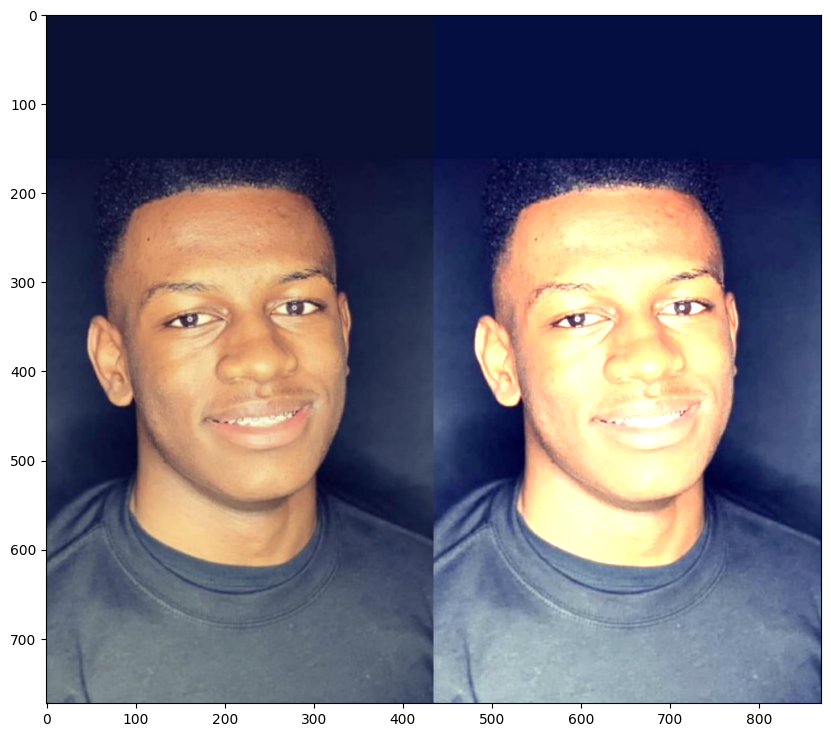

In [28]:
imgContrast = cv2.convertScaleAbs(img, alpha = 1.5, beta=-10)
imgTwo = np.concatenate((img, imgContrast), axis = 1)

fig = plt.figure(figsize = (10,10))
plt.imshow(imgTwo)

In [29]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

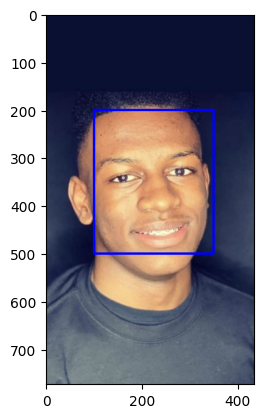

In [30]:
top_left = (100,200)
bottom_right = (350,500)
rect_color = (255,0,0)
thickness = 3

img_rect = cv2.rectangle(img, top_left, bottom_right,rect_color, thickness)

img_rect = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rect)


In [31]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:500,100:350] = 255
print(mask.shape)


(773, 435)


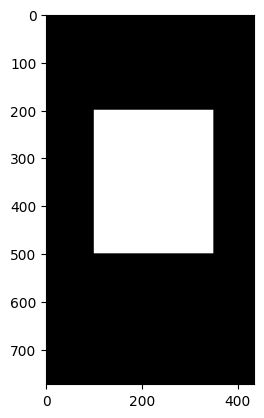

In [32]:
plt.imshow(mask,cmap = "gray")

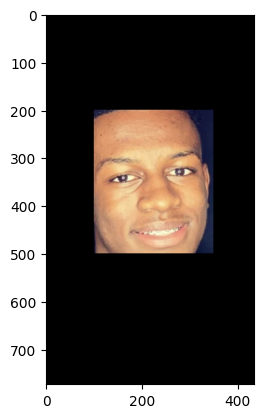

In [33]:
img = cv2.imread("JFImage.jpg")
img_masked = cv2.bitwise_and(img,img, mask = mask)
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)
plt.imshow(img_masked)

In [62]:
img = cv2.imread("JFImage.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [63]:
def rgb_to_hsv(rgb):
    rgb = rgb/255

    h = 0.0
    s = 0.0
    v = 0.0

    v = np.max(rgb)
    vMin = np.min(rgb)

    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0
    
    diff = (v-vMin)
    
    if(rgb[0,0,0] == rgb[0,0,1] and rgb[0,0,1] == rgb[0,0,2]):
        h = 0
    elif(rgb[0,0,0] == v):
        h = 60 *(rgb[0,0,1] - rgb[0,0,2])/diff
    elif(rgb[0,0,1] == v):
        h = 120 + 60 * (rgb[0,0,2] - rgb[0,0,0]) / diff
    elif(rgb[0,0,2] == v):
        h = 240 + 60 * (rgb[0,0,0] -rgb[0,0,1])/ diff
    
    hsv = np.array([[[h, s, v]]])
    s = np.interp(.725,[0,1],[0,255])
    v = np.interp(.78431,[0,1],[0,255])

    return np.array([[[(hsv[0,0,0]/2),round(s),round(v)]]])


In [64]:
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]
def img_rgb_to_hsv(img):
    for y in range(0,h):
    #Search each pixel in the row
        for x in range(0,w):
            currPixel = (img[y,x])
            converted = np.array(currPixel.reshape((1,1,3)))
            hsv = rgb_to_hsv(converted)
            img[y,x] = hsv


            

img_rgb_to_hsv(img)


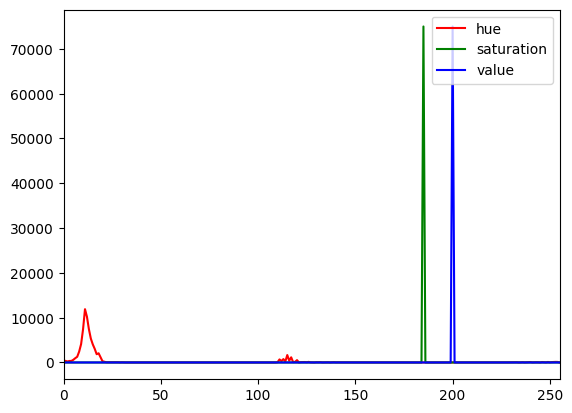

In [65]:
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color ="red")
plt.xlim([0,255])

hist= cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist,color="green")
plt.xlim([0,255])

hist= cv2.calcHist([img],[2],mask, [256],[0,255])
plt.plot(hist, color = "blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper right')
plt.show()


For the cell below I couldn't find a way to make the image show with the mask. I kept getting a black screen for some reason.

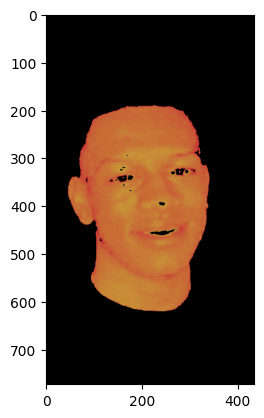

In [66]:
min_HSV = np.array([0,175,195], np.uint8)
max_HSV = np.array([20,185,200], np.uint8)

skinArea = cv2.inRange(img, min_HSV, max_HSV)
skinHSV = cv2.bitwise_and(img, img, mask= skinArea)
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)


plt.imshow(skinHSV)
